In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install bs4
!pip install requests

In [21]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [17]:
# STEP 1: Import Libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
# STEP 2: Set the target URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# STEP 3: Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
# STEP 4: Send request and parse the HTML
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
# STEP 5: Extract all tables into dataframes
dfs = pd.read_html(str(tables))
# STEP 6: Locate and display the Tesla Annual Revenue table
for df in dfs:
    if "Tesla Annual Revenue" in df.columns[0]:
        revenue_df = df.copy()
        break
# STEP 7: Clean and rename columns
revenue_df.columns = ["Year", "Revenue (in Millions USD)"]
revenue_df["Revenue (in Millions USD)"] = revenue_df["Revenue (in Millions USD)"].replace('[\$,]', '', regex=True).astype(float)
# STEP 8: Reset index and show table nicely
revenue_df.reset_index(drop=True, inplace=True)
revenue_df.head(10)  # Shows top 10 rows like a clean table

,Year,Revenue (in Millions USD)
0,2024,97690.0
1,2023,96773.0
2,2022,81462.0
3,2021,53823.0
4,2020,31536.0
5,2019,24578.0
6,2018,21461.0
7,2017,11759.0
8,2016,7000.0
9,2015,4046.0


In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [25]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
# Step 1: Set the target URL
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
# Step 2: Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
# Step 3: Send request and parse HTML
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Step 4: Find all tables and read with pandas
tables = soup.find_all("table")
dfs = pd.read_html(str(tables))
# Step 5: Loop through tables to find GameStop Annual Revenue
revenue_df = None
for df in dfs:
    if "GameStop Annual Revenue" in str(df.columns[0]):
        revenue_df = df.copy()
        break
# Step 6: Clean and rename columns
if revenue_df is not None:
    revenue_df.columns = ["Year", "Revenue (in Millions USD)"]
    revenue_df["Revenue (in Millions USD)"] = (
        revenue_df["Revenue (in Millions USD)"]
        .replace({"\$": "", ",": ""}, regex=True)
        .astype(float)
    )
    # Step 7: Reset index and display clean output
    revenue_df.reset_index(drop=True, inplace=True)
    display(revenue_df.head(15))  # You can increase to .head(20) if needed
else:
    print("❌ GameStop Revenue Table not found.")

,Year,Revenue (in Millions USD)
0,2025,3823.0
1,2024,5273.0
2,2023,5927.0
3,2022,6011.0
4,2021,5090.0
5,2020,6466.0
6,2019,8285.0
7,2018,8547.0
8,2017,7965.0
9,2016,9364.0


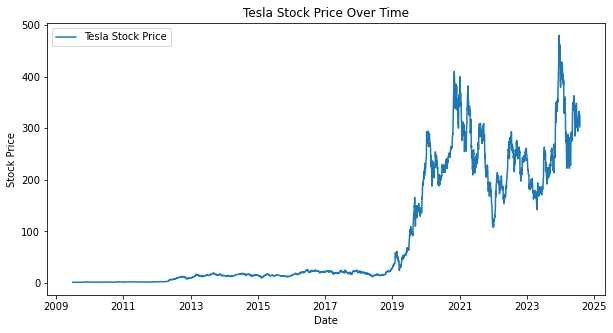

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(tesla_data['Date'], tesla_data['Close'], label="Tesla Stock Price")
# Manually match to revenue dates if necessary (basic plot)
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

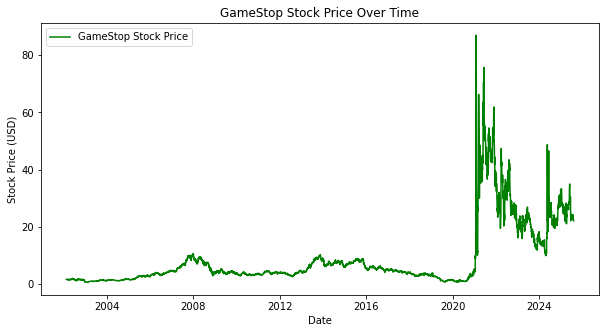

In [27]:
# Import matplotlib if not already done
import matplotlib.pyplot as plt
# Plot GameStop stock price
plt.figure(figsize=(10, 5))
plt.plot(gme_data['Date'], gme_data['Close'], label="GameStop Stock Price", color='green')
# Title and labels
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
# Display the plot
plt.show()